In [106]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [107]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'ALFAA.MX'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [108]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,20.750000,20.070000,20.540001,20.549999,12463644.0,20.493969
2019-03-21,21.000000,20.370001,20.500000,20.790001,7724473.0,20.733316
2019-03-22,20.730000,20.120001,20.730000,20.150000,4897663.0,20.095060
2019-03-25,20.469999,20.150000,20.230000,20.340000,5574476.0,20.284544
2019-03-26,20.559999,20.160000,20.350000,20.360001,5994428.0,20.304487


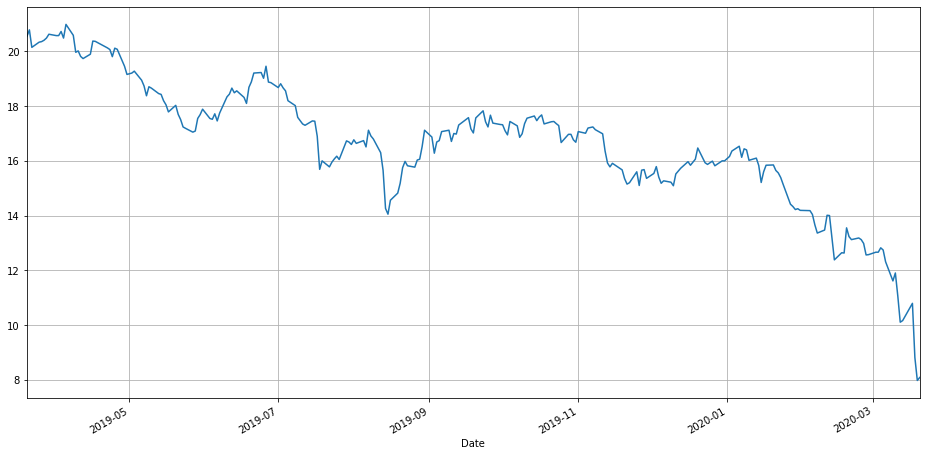

In [109]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [120]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [124]:
df2 = ROC(data, 10)

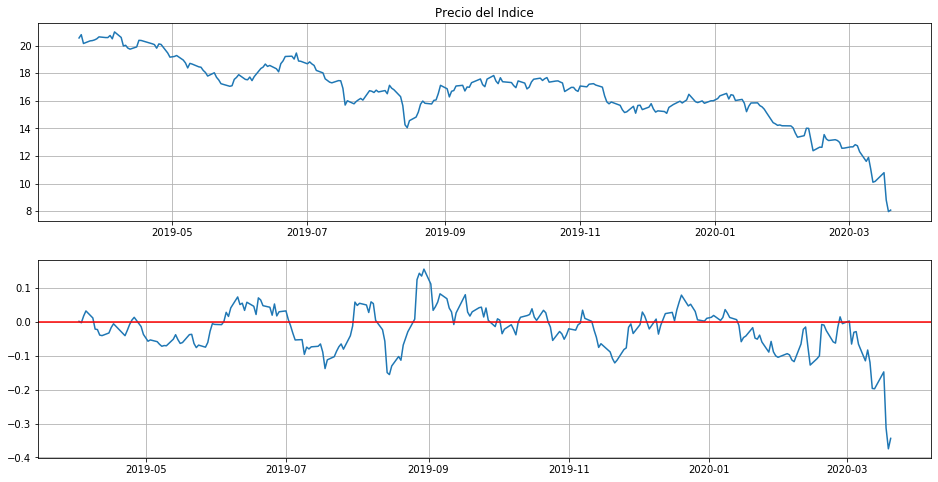

,Close,ROC_10,Recomendación
Date,,,
2019-04-03,20.730000,-0.002886,Se recomienda VENDER la acción. (DIV)
2019-04-04,20.490000,0.016873,Se recomienda COMPRAR la acción. (DIV)
2019-04-09,19.969999,-0.021558,Se recomienda VENDER la acción.
2019-04-25,20.120001,0.004995,Se recomienda COMPRAR la acción.
2019-04-29,19.459999,-0.014184,Se recomienda VENDER la acción.
2019-06-04,17.520000,0.000571,Se recomienda COMPRAR la acción. (DIV)
2019-07-03,18.670000,-0.011646,Se recomienda VENDER la acción.
2019-07-31,16.600000,0.057999,Se recomienda COMPRAR la acción. (DIV)
2019-08-12,16.299999,-0.023367,Se recomienda VENDER la acción.


In [126]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]